<a href="https://colab.research.google.com/github/yarusx/cat-vs-dogo/blob/main/dog_cat_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
# import PIL
# import PIL.Image
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
# import pathlib # return if needed
from google.colab import drive # make load from url

In [ ]:
drive.mount('/content/drive') # make load from url

!unzip -q /content/drive/MyDrive/dvc.zip # make load from url
!unzip -q /content/drive/MyDrive/dogs_breeds.zip # make load from url
!unzip -q /content/drive/MyDrive/cats_breeds.zip # make load from url

dvc_model = tf.keras.models.load_model('/content/saved_model/dvc') # make load from url
dogs_model = tf.keras.models.load_model('/content/saved_model/dogs') # make load from url
cats_model = tf.keras.models.load_model('/content/saved_model/cats') # make load from url

Mounted at /content/drive


In [ ]:
## TRY TO ADD GETTING CATEGORIES FROM MODELS DATA

categories = ["Cat", "Dog"]
d_breeds = ['pug', 'basset_hound', 'shiba_inu', 'leonberger', 'saint_bernard', 'miniature_pinscher', 'wheaten_terrier', 'scottish_terrier', 'pomeranian', 'german_shorthaired', 'english_setter', 'newfoundland', 'boxer', 'great_pyrenees', 'samoyed', 'japanese_chin', 'english_cocker_spaniel', 'havanese', 'american_pit_bull_terrier', 'keeshond', 'american_bulldog', 'chihuahua', 'beagle', 'yorkshire_terrier', 'staffordshire_bull_terrier']
c_breeds = ['egyptian_mau', 'siamese', 'birman', 'abyssinian', 'sphynx', 'british_shorthair', 'bombay', 'russian_blue', 'persian', 'ragdoll', 'maine_coon', 'bengal']

In [ ]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(160, 160))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 160, 160, 3)
	return img

img = load_image('/content/drive/MyDrive/dayana_1.JPG') #make input from upload

This is a Dog


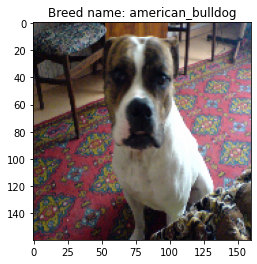

In [ ]:
prediction = dvc_model.predict(img)
prediction = tf.nn.sigmoid(prediction)
int_prediction = int(np.round_(prediction))

### Make via function
#Cats
if int_prediction == 0:
  print('This is a ' + categories[int_prediction])
  breed_prediction = cats_model.predict(img)
  breed_prediction = tf.nn.softmax(breed_prediction)
  breed_prediction = np.argmax(breed_prediction, axis=1)
  plt.figure()
  plt.imshow(img[0]/255)
  plt.title('Breed name: ' + c_breeds[int(breed_prediction)])

#Dogs
else:
  print('This is a ' + categories[int_prediction])
  breed_prediction = dogs_model.predict(img)
  breed_prediction = tf.nn.softmax(breed_prediction)
  breed_prediction = np.argmax(breed_prediction, axis=1)
  plt.figure()
  plt.imshow(img[0]/255)
  plt.title('Breed name: ' + d_breeds[int(breed_prediction)])

In [ ]:
## Uploading file and make prediction from the upload. NEED TO BE REWORKED
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")